# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | vorkuta
Processing Record 10 of Set 1 | funafuti
Processing Record 11 of Set 1 | severo-yeniseyskiy
Processing Record 12 of Set 1 | kailua-kona
Processing Record 13 of Set 1 | meadow lakes
Processing Record 14 of Set 1 | callaway
Processing Record 15 of Set 1 | yelizovo
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | prince rupert
Processing Record 18 of Set 1 | kurumkan
Processing Record 19 of Set 1 | egersund
Processing Record 20 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 21 of Set 1 | bet

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,12.12,92,82,1.34,NZ,1738698442
1,wailua homesteads,22.0669,-159.3780,21.44,77,20,4.63,US,1738698443
2,grytviken,-54.2811,-36.5092,5.20,68,25,10.81,GS,1738698444
3,blackmans bay,-43.0167,147.3167,12.07,75,40,2.36,AU,1738698446
4,iqaluit,63.7506,-68.5145,-26.15,64,20,4.63,CA,1738698448


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,92,82,1.34,NZ,1738698442
1,wailua homesteads,22.0669,-159.3780,21.44,77,20,4.63,US,1738698443
2,grytviken,-54.2811,-36.5092,5.20,68,25,10.81,GS,1738698444
3,blackmans bay,-43.0167,147.3167,12.07,75,40,2.36,AU,1738698446
4,iqaluit,63.7506,-68.5145,-26.15,64,20,4.63,CA,1738698448


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

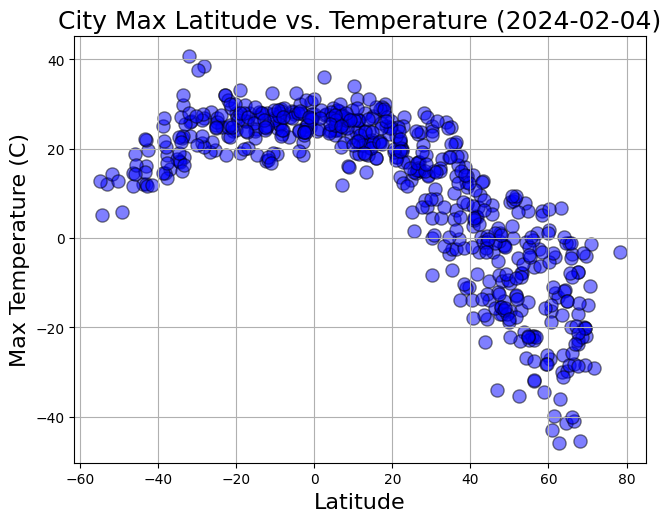

In [21]:
# Build scatter plot for latitude vs. temperature
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Max Temp"]
plt.scatter(xPlot, yPlot, 90, marker = "o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude",fontsize=16)
plt.ylabel("Max Temperature (C)", fontsize=16)
plt.title("City Max Latitude vs. Temperature (2024-02-04)", fontsize=18)

# Save the figure
plt.savefig("../output_data/Fig1.png",dpi=300,bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude Vs. Humidity

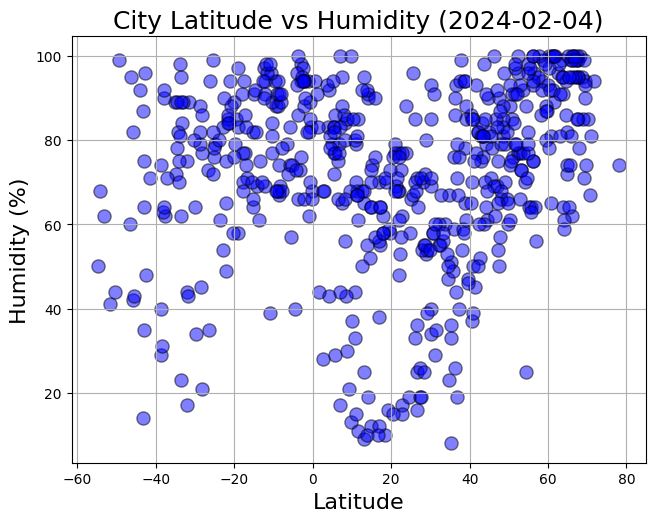

In [22]:
# Build the scatter plots for latitude vs. humidity
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Humidity"]
plt.scatter(xPlot, yPlot, 90, marker = "o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude",fontsize=16)
plt.ylabel("Humidity (%)", fontsize=16)
plt.title("City Latitude vs Humidity (2024-02-04)", fontsize=18)

# Save the figure
plt.savefig("../output_data/Fig2.png",dpi=300,bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

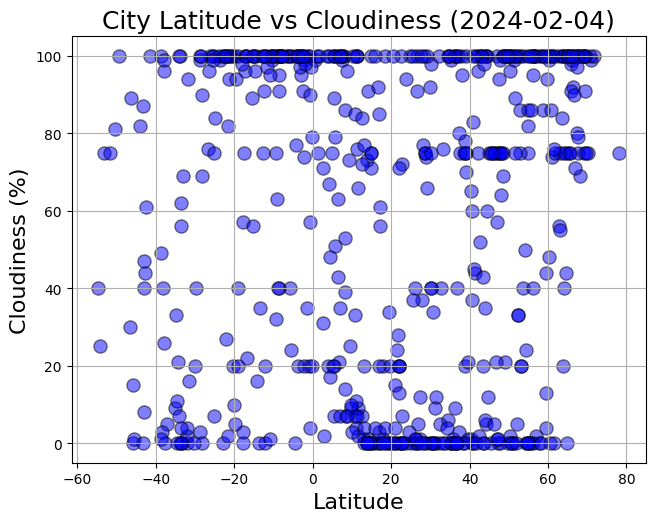

In [23]:
# Build the scatter plots for latitude vs. cloudiness
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Cloudiness"]
plt.scatter(xPlot, yPlot, 90, marker = "o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude",fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.title("City Latitude vs Cloudiness (2024-02-04)", fontsize=18)

# Save the figure
plt.savefig("../output_data/Fig3.png",dpi=300,bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

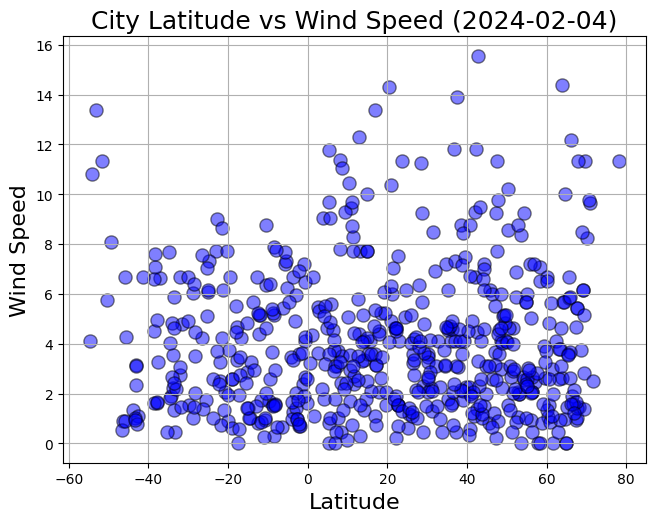

In [24]:
# Build the scatter plots for latitude vs. wind speed
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Wind Speed"]
plt.scatter(xPlot, yPlot, 90, marker = "o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude",fontsize=16)
plt.ylabel("Wind Speed", fontsize=16)
plt.title("City Latitude vs Wind Speed (2024-02-04)", fontsize=18)

# Save the figure
plt.savefig("../output_data/Fig4.png",dpi=300,bbox_inches = "tight")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, strderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, 90, marker="o", facecolors="blue", alpha=0.5)
    plt.plot(x_values,regress_values, "r-", linewidth=3)
    plt.grid(True)
    print(f"the r-value is {rvalue}")
    plt.annotate(line_eq,(regEQplotX,regEQplotY), fontsize=18,color="red")
    plt.xlabel("Latitude", fontsize=16)
    plt.ylabel(f"{ylabel}",fontsize=16)
    plt.grid()

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,21.44,77,20,4.63,US,1738698443
4,iqaluit,63.7506,-68.5145,-26.15,64,20,4.63,CA,1738698448
6,bethel,41.3712,-73.4140,4.97,45,44,4.92,US,1738698451
7,vorkuta,67.5000,64.0000,-23.61,99,80,0.92,RU,1738698452
9,severo-yeniseyskiy,60.3725,93.0408,-27.02,100,48,1.06,RU,1738698454


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,92,82,1.34,NZ,1738698442
2,grytviken,-54.2811,-36.5092,5.20,68,25,10.81,GS,1738698444
3,blackmans bay,-43.0167,147.3167,12.07,75,40,2.36,AU,1738698446
5,invercargill,-46.4000,168.3500,11.68,95,89,0.89,NZ,1738698449
8,funafuti,-8.5243,179.1942,29.00,74,40,5.14,TV,1738698453


###  Temperature vs. Latitude Linear Regression Plot

the r-value is -0.8502320612547181


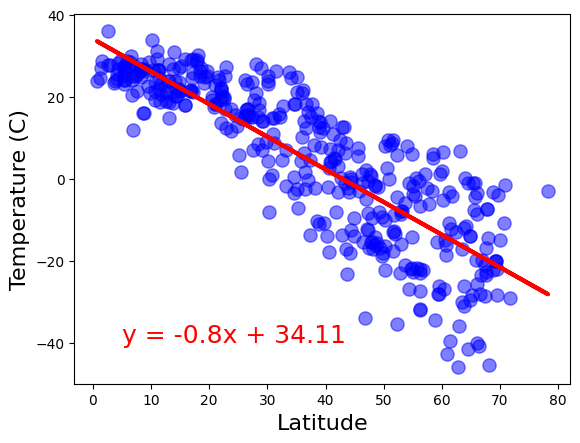

In [37]:
# Linear regression on Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Max Temp"]
linearRegression(x_plot,y_plot, 5, -40, "Temperature (C)")
plt.savefig("../output_data/Fig5.png",dpi=300, bbox_inches="tight")

the r-value is 0.5564640329346396


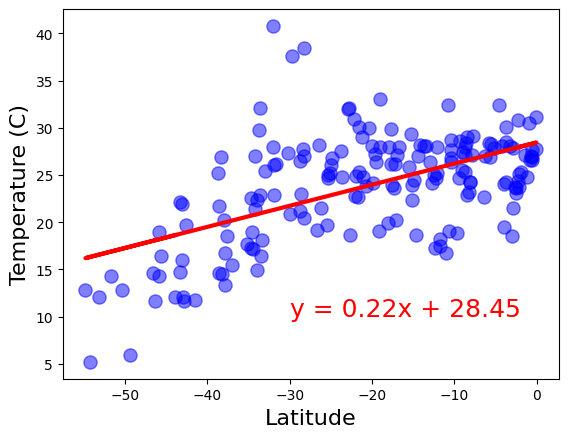

In [39]:
# Linear regression on Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Max Temp"]
linearRegression(x_plot,y_plot, -30, 10, "Temperature (C)")
plt.savefig("../output_data/Fig6.png",dpi=300, bbox_inches="tight")

**Discussion about the linear relationship:** The Northern Hemisphere has a stronger correlation between Temperature and Latitude as opposed to the Southern Hemipshere with Northern having a .85 and Southern having a .55.

### Humidity vs. Latitude Linear Regression Plot

the r-value is 0.41384397529979516


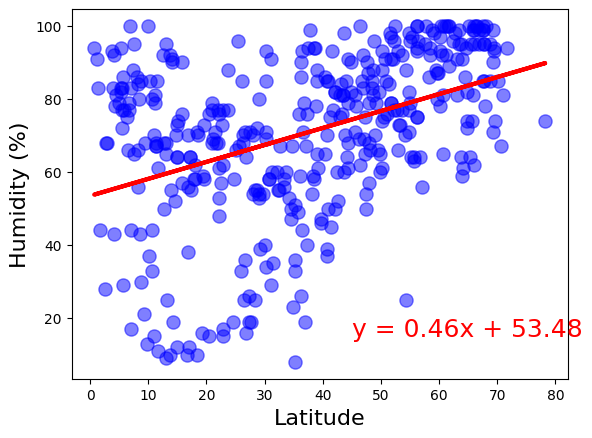

In [44]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Humidity"]
linearRegression(x_plot,y_plot, 45, 15, "Humidity (%)")
plt.savefig("../output_data/Fig7.png",dpi=300, bbox_inches="tight")

the r-value is 0.3500444440928793


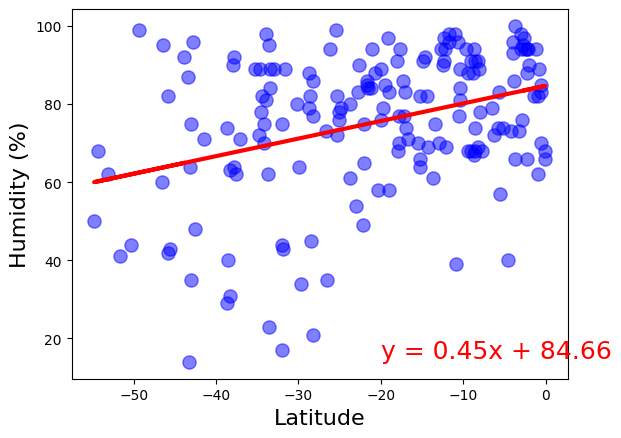

In [46]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Humidity"]
linearRegression(x_plot,y_plot, -20, 15, "Humidity (%)")
plt.savefig("../output_data/Fig8.png",dpi=300, bbox_inches="tight")

**Discussion about the linear relationship:** The correlation between Southern and Northern Hemisphere is consistant, with Northern having a r-value of .413 and Southern having a r-value of .35, making it a insignificant change.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is 0.271062058414226


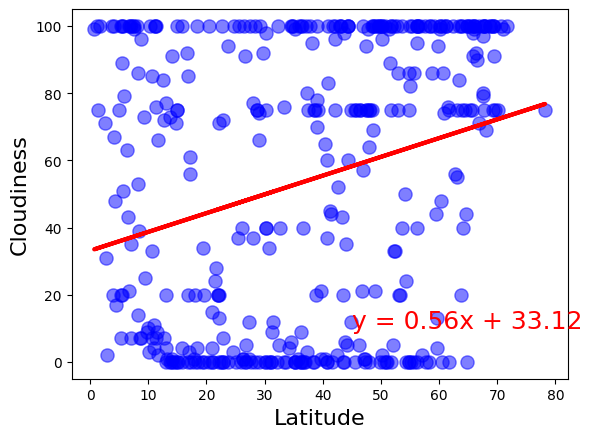

In [55]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Cloudiness"]
linearRegression(x_plot,y_plot, 45, 10, "Cloudiness")
plt.savefig("../output_data/Fig9.png",dpi=300, bbox_inches="tight")

the r-value is 0.32564001127229036


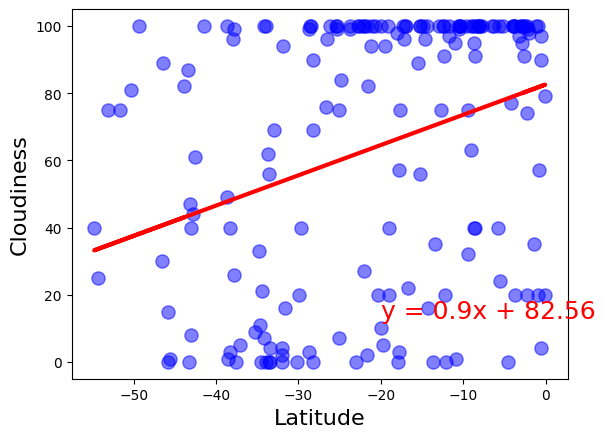

In [50]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Cloudiness"]
linearRegression(x_plot,y_plot, -20, 13, "Cloudiness")
plt.savefig("../output_data/Fig10.png",dpi=300, bbox_inches="tight")

**Discussion about the linear relationship:** The Correlation between Northern and Southern Hemisphere is similar with Northern having a r-value of .27 and Southern having a .32, meaning the relationship between the two is Stochastic.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is -0.032164047604000025


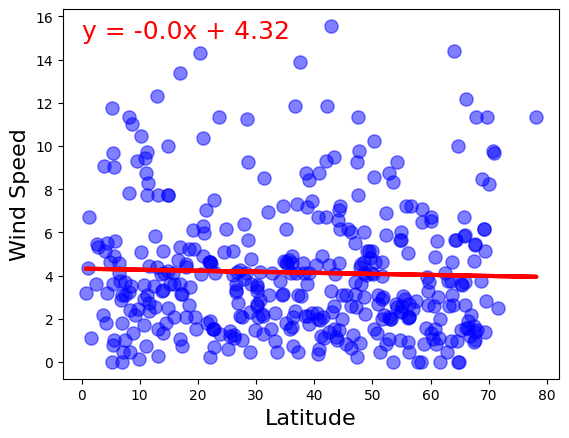

In [54]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Wind Speed"]
linearRegression(x_plot,y_plot, 0, 15, "Wind Speed")
plt.savefig("../output_data/Fig11.png",dpi=300, bbox_inches="tight")

the r-value is -0.14611340743478687


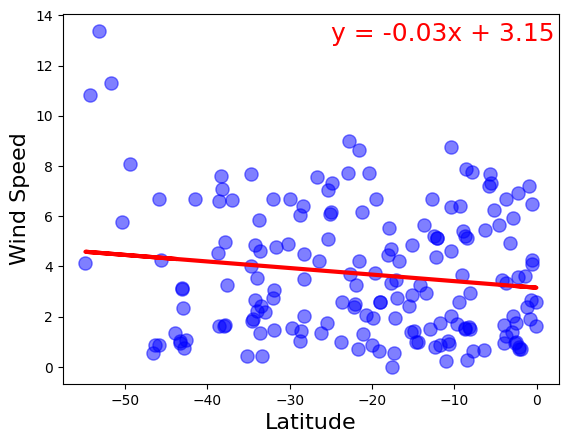

In [57]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Wind Speed"]
linearRegression(x_plot,y_plot, -25, 13, "Wind Speed")
plt.savefig("../output_data/Fig12.png",dpi=300, bbox_inches="tight")

**Discussion about the linear relationship:** The Correlation between Wind Speed and Latitude is stronger with the Northern Hemisphere as it is closer to 0 with a .032 where as the Southern Hemisphere has a .146, showing that wind speeds overall gets lower as gets closer to the equator.